# Linear Regression Analysis - Boston Dataset

##### <u>**Đặt Vấn Đề / Bài Toán:**</u> Dựa vào các thuộc tính trong bảng dataset Boston Housing, áp dụng phương pháp hồi quy tuyến tính để dự đoán giá nhà bằng cách tối ưu hóa hàm mất mát dựa trên phương pháp bình phương tối tiểu.

**Cài Đặt Thư Viện**

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy.stats import skew
from statsmodels.stats.outliers_influence import variance_inflation_factor

##### **I. Bản chất dữ liệu**

**Dataset được chọn:** Boston Housing  
- Tập dữ liệu này chứa thông tin về các ngôi nhà trong khu vực Boston, Massachusetts, Hoa Kỳ.
<br>
- Tập dữ liệu Boston Housing bao gồm 506 mẫu và 13 thuộc tính, bao gồm các thông tin về môi trường xung quanh các ngôi nhà, chẳng hạn như tỷ lệ phòng tắm, tỷ lệ tội phạm, khoảng cách đến các trung tâm thương mại và trạm xe buýt, diện tích trung bình của các căn hộ chung cư xung quanh và nhiều thuộc tính khác:  
<br>
    1. CRIM: Tỷ lệ tội phạm bằng cách tính tổng số tội phạm trên một dân số mỗi 1 phần trăm.
    2. ZN: Tỷ lệ đất thổ cư dành cho các lô đất trên 25.000 feet vuông.
    3. INDUS: Tỷ lệ diện tích kinh doanh không bao gồm khu đô thị cho mỗi thị trấn.
    4. CHAS: Biến giả có giá trị bằng 1 nếu lô đất nằm cạnh sông Charles, và 0 nếu không phải.
    5. NOX: Nồng độ ô nhiễm không khí.
    6. RM: Số phòng trung bình trên một căn hộ.
    7. AGE: Tỷ lệ số lượng căn hộ được xây dựng trước năm 1940.
    8. DIS: Khoảng cách trung bình đến năm trung tâm việc làm lớn nhất của Boston.
    9. RAD: Chỉ số tiện ích truy cập đường cao tốc.
    10. TAX: Thuế suất tài sản trên mỗi 10.000 đô la Mỹ.
    11. PTRATIO: Tỷ lệ học sinh giáo viên.
    12. B: 1000(Bk - 0.63)^2 trong đó Bk là tỷ lệ người da đen bằng 1000.
    13. LSTAT: Tỷ lệ phần trăm dân số có địa vị kinh tế thấp.  
<br>
- Cột MEDV trong tập dữ liệu Boston Housing là cột chứa giá trị trung bình của các ngôi nhà được đo bằng đơn vị 1.000 đô la Mỹ. MEDV là mục tiêu của bài toán dự đoán giá nhà, cũng là thuộc tính được dự đoán bởi các mô hình toán học.  

Để đánh giá bản chát của dữ liệu, chúng ta cần xem xét yếu tố tương quan và khả năng tuyến tính của các điểm dữ liệu trong biểu đồ phân tán.  

In [ ]:
# Đọc dữ liệu từ file CSV vào DataFrame
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')
# Hiển thị 5 dòng đầu tiên của dữ liệu Boston
display(df.head())

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
# Thống kê mô tả của giá trị trung bình của giá nhà (MEDV)
print(df['medv'].describe())

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: medv, dtype: float64


##### **II. Tiếp Cận và Phương Pháp**

**A. Tiếp cập vấn đề:**  

1. Bước đầu tiên là xử lý dữ liệu để tìm mối tương quan giữa các thuộc tính với mục tiêu dự đoán bằng ma trận tương quan cũng như xử lý các giá trị ngoại lai (Outlier).
2. Bước tiếp theo trong tiếp cận này là tách tập dữ liệu thành tập huấn luyện và tập kiểm tra.
2. Sau đó, áp dụng phương pháp hồi quy tuyến tính để dự đoán giá nhà bằng cách tối ưu hóa hàm mất mát dựa trên phương pháp bình phương tối tiểu.
3. Bằng cách tính toán ma trận nghịch đảo của tích ma trận chuyển vị của ma trận đầu vào và ma trận đầu vào, ta có thể tính được các tham số tối ưu cho mô hình hồi quy tuyến tính.
4. Cuối cùng, mô hình được sử dụng để dự đoán giá nhà trên tập kiểm tra và đánh giá sự hiệu quả của mô hình bằng cách tính toán các chỉ số RMSE và R bình phương.  
<br>  

**B. Phương pháp Bình Phương Tối Tiểu (Least Squares - LS):**

Phương pháp Bình Phương Tối Tiểu có 2 biến thể là Univariable least square (LS đơn biến - được sử dụng khi chỉ có một biến độc lập được sử dụng để dự đoán biến phụ thuộc) và Multivariable least square (LS đa biến - được sử dụng khi có nhiều hơn một biến độc lập được sử dụng để dự đoán biến phụ thuộc).  
Trong bài lab này, chúng ta sẽ sử dụng LS đa biến.  
Trong LS đa biến, chúng ta tìm một đường thẳng tuyến tính tốt nhất để mô hình hóa mối quan hệ giữa biến phụ thuộc và nhiều biến độc lập trong tập dữ liệu nhiều chiều.   

Mô hình hồi quy tuyến tính đa biến có dạng:  

$Y = \beta_{0} + \beta_{1}X_{1} + \beta_{2}X_{2} + \cdots + \beta_{n}X_{n} + \epsilon$  

Trong đó:

- Y là biến phụ thuộc
- X1, X2, ..., Xn là các biến độc lập
- β0, β1, β2, ..., βn là các hệ số cần được ước lượng
- ε là sai số (residual)  

Để tìm hệ số tối thiểu, chúng ta cần tìm giá trị của β0 và β1 sao cho tổng bình phương sai số (sum of squared residuals) là nhỏ nhất.  
Phương trình bình phương tối tiểu sai số của mô hình hồi quy tuyến tính có thể tính được bằng cách giải hệ phương trình sau:   
<br>
$\hat{\boldsymbol{\theta}} = (\mathbf{X}^\top \mathbf{X})^{-1} \mathbf{X}^\top \mathbf{y}$ = $\min_{\theta} ||\mathbf{y} - \mathbf{X}\theta||^2_2$
<br>
Trong đó:

- $\hat{\boldsymbol{\theta}}$ là vector cột các bộ tham số hồi quy tuyến tính tối ưu
- $\mathbf{X}$ là ma trận thiết kế có số hàng là số mẫu và số cột là số đặc trưng (bao gồm cột toàn bộ giá trị 1 cho hệ số điều chỉnh)
- $\mathbf{y}$ là vector cột các giá trị nhãn tương ứng với từng mẫu


<u>Những vấn đề có thể gặp phải:</u>  
- Không có mối liên hệ tuyến tính giữa các biến độc lập và biến phụ thuộc.  
- Có giá trị ngoại lai (Outlier).  
- Có tương quan giữa các sai số.  
- Collinearity (cộng tuyến tính giữa các biến độc lập).   
<br>  

**C. Tại sao sử dụng phương pháp bình phương tối tiểu:**  

Trong bài lab này, chúng ta sử dụng phương pháp bình phương tối tiểu để tính toán bộ tham số cho mô hình hồi quy tuyến tính.  
Điều này được sử dụng để tìm ra một đường thẳng, có thể biểu diễn mối quan hệ tuyến tính giữa biến đầu vào và biến đầu ra.  
Phương pháp bình phương tối tiểu cố gắng tìm ra một đường thẳng sao cho tổng bình phương sai số trên tập huấn luyện là nhỏ nhất có thể.

Cụ thể trong dữ liệu của chúng ta, chúng ta sử dụng ma trận đầu vào X_train và vector đầu ra y_train để tính toán bộ tham số theta bằng phương pháp bình phương tối tiểu.  
Công thức tính toán bộ tham số theta được trình bày như trên.  
Để tính toán bộ tham số theta, chúng ta sử dụng ma trận nghịch đảo của ma trận X^T X, được tính bằng công thức:  

$ (X^T X)^{-1} = (X^T X)^{-1} X^T X (X^T X)^{-1} $

Tuy nhiên, trước khi tính toán bộ tham số theta, chúng ta cần kiểm tra tính đảo của ma trận X^T X bằng cách kiểm tra giá trị định thức của nó.  
Nếu giá trị định thức bằng 0, tức là ma trận không đảo được, chúng ta không thể sử dụng phương pháp bình phương tối tiểu để tính toán bộ tham số theta.  
<br>
**D. Giải Quyết Bài Toán:**  
1. Tính ma trận tương quan giữa các thuộc tính

<u><i>Khái niệm về ma trận tương quan:</u></i>  

Ma trận tương quan là một khái niệm trong thống kê và đại số tuyến tính, thường được sử dụng để đo lường mối quan hệ tuyến tính giữa các thuộc tính trong một tập dữ liệu. Ma trận tương quan được tạo thành bằng cách tính toán các hệ số tương quan giữa từng cặp thuộc tính, sau đó sắp xếp chúng vào một ma trận vuông.

Các giá trị trong ma trận tương quan thể hiện mức độ tương quan giữa các cặp thuộc tính.  
Nếu giá trị tương quan gần bằng 1, có nghĩa là hai thuộc tính có một mối quan hệ tuyến tính mạnh; nếu giá trị tương quan gần bằng 0, có nghĩa là không có mối quan hệ tuyến tính giữa hai thuộc tính.

In [ ]:
corr_matrix = df.corr()
display(corr_matrix)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


Để dễ hình dung, ta trực quan hoá ma trận tương quan bằng một bản đồ nhiệt:

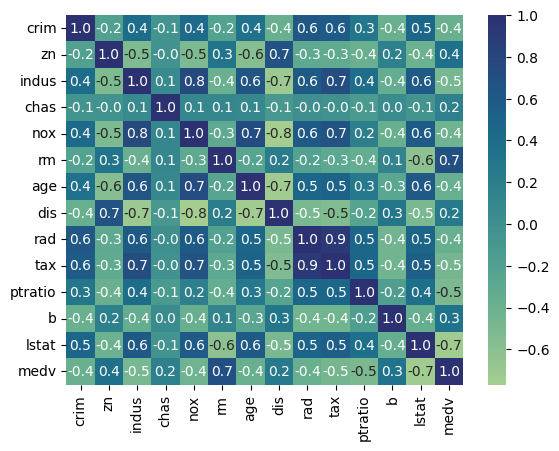

In [ ]:
sns.heatmap(corr_matrix, annot=True, fmt=".1f", cmap ="crest");

Bản đồ nhiệt cho ta thấy hệ số tương quan của 2 thuộc tính RM (0.7 - tương quan thuận) và LSTAT (-0.7 tương quan nghịch) là cao nhất đối với giá trị MEDV mà chúng ta cần tính.  
Để có cái nhìn rõ hơn về phân bổ của 2 thuộc tính này với giá nhà MEDV, ta sẽ sử dụng pairplot.  
<br>
<u><i>Khái niệm về Pairplot:</u></i>    
Pairplot là một khái niệm trong trực quan hóa dữ liệu, được sử dụng để biểu diễn tất cả các cặp mối quan hệ giữa các thuộc tính trong một tập dữ liệu. Pairplot thường được biểu diễn dưới dạng một ma trận các biểu đồ phân tán, trong đó mỗi biểu đồ phân tán đại diện cho mối quan hệ tuyến tính giữa hai thuộc tính.



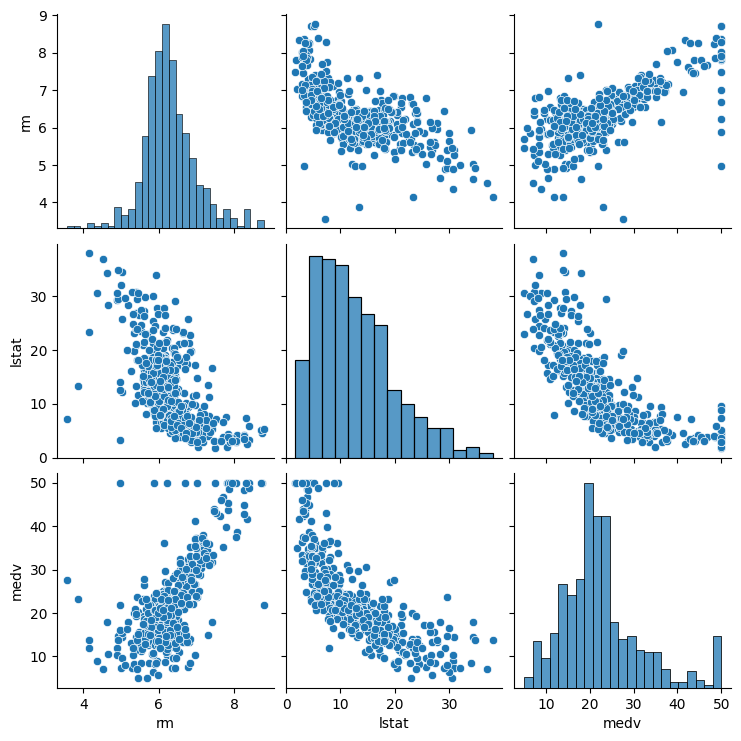

In [ ]:
sns.pairplot(df[['rm', 'lstat', 'medv']]);

Trong biểu đồ pairplot của tập dữ liệu giá nhà ở Boston, chúng ta có thể thấy rằng giá nhà có một mối quan hệ tuyến tính với số phòng trong nhà (biến độc lập RM) và có một mối quan hệ đảo chiều với tỷ lệ dân số thấp hơn (biến độc lập LSTAT). Cụ thể, khi RM tăng thì MEDV (giá nhà) cũng tăng và khi LSTAT tăng thì MEDV giảm.  
<br>
Ngoài ra, biểu đồ cũng cho thấy 2 biến độc lập RM và LSTAT có hệ số tương quan mạnh (-0.6) với nhau.  
Điều này có thể dẫn đến hiện tượng cộng tuyến (collinearity) giữa chúng.  
<br>
<u><i>Khái niệm về sự cộng tuyến trong hồi quy tuyến tính:</u></i>  
- Trong mô hình hồi quy tuyến tính, đa cộng tuyến là tình trạng khi hai hoặc nhiều biến độc lập trong mô hình có một mức độ tương quan mạnh với nhau.  
- Điều này có thể dẫn đến việc ước lượng sai số của các hệ số hồi quy, làm giảm độ chính xác của mô hình và làm mất đi tính toán và dự đoán hiệu quả của mô hình.  
- Cộng tuyến là một vấn đề quan trọng trong phân tích dữ liệu và nghiên cứu khoa học, và yêu cầu các phương pháp đặc biệt để xác định và giảm thiểu tác động của nó.  
- Các phương pháp như sử dụng chỉ số VIF (Variance Inflation Factor) hoặc phân tích hàm tổng quan sẽ giúp xác định mức độ cộng tuyến và đưa ra các giải pháp để giảm thiểu tác động của nó trên mô hình hồi quy tuyến tính.  

<br>  
<u><i>Khái niệm về chỉ số VIF:</u></i>   

- Chỉ số VIF (Variance Inflation Factor) được sử dụng để đánh giá mức độ cộng tuyến của các biến độc lập trong mô hình hồi quy tuyến tính. Chỉ số VIF cho biết độ lớn của phương sai tương đương của mỗi biến độc lập sau khi đã loại bỏ tác động của các biến độc lập khác trên biến đó. Vì vậy, nếu giá trị VIF cho một biến độc lập càng cao, thì biến đó càng có khả năng bị đa cộng tuyến.  
- Chỉ số VIF được tính bằng cách tính tỷ lệ giữa phương sai của mô hình hồi quy đa biến với biến đó và phương sai của mô hình hồi quy đơn biến của biến đó. Nếu giá trị VIF lớn hơn 1, thì biến đó được coi là có tác động của cộng tuyến. Thông thường, nếu giá trị VIF lớn hơn 5 hoặc 10, thì biến đó được coi là bị đa cộng tuyến và cần phải được xử lý để giảm thiểu tác động của đa cộng tuyến trên mô hình hồi quy.  

In [ ]:
# Chọn các biến độc lập và biến phụ thuộc
Independent_vars = df[['rm', 'lstat']].values
# Thêm một cột chứa giá trị 1 vào ma trận X để tính toán hệ số chặn
Independent_vars = np.insert(Independent_vars, 0, 1, axis=1)
# Tính toán VIF cho các biến độc lập
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(Independent_vars, i) for i in range(1, Independent_vars.shape[1])]
vif["features"] = ['rm', 'lstat']
# In kết quả
print(vif)

   VIF Factor features
0     1.60452       rm
1     1.60452    lstat


Dựa vào kết quả của VIF, ta thấy rằng cả hai biến độc lập RM và LSTAT đều có giá trị VIF nhỏ hơn 5, có thể kết luận rằng không có sự cộng tuyến (collinearity) giữa chúng.  
Vì vậy, ta có thể sử dụng cả hai biến độc lập này trong mô hình hồi quy tuyến tính một cách an toàn.  


2. Xử lý giá trị ngoại lai (Outlier)   

Giá trị ngoại lai có thể gây ảnh hưởng rất lớn đến các tham số của mô hình tuyến tính, đặc biệt là hệ số góc vì nó làm thay đổi độ dốc của đường tuyến tính.  
Việc có giá trị ngoại lai trong dữ liệu sẽ làm cho mô hình tuyến tính không thể tốt hơn được nữa bởi vì chúng có thể gây ra sự thay đổi lớn đối với các tham số của mô hình.  
Trong trường hợp này, mô hình sẽ dự đoán không chính xác và có thể dẫn đến quyết định sai lầm. Vì vậy, việc xác định và loại bỏ các giá trị ngoại lai là rất cần thiết để đạt được kết quả tốt nhất từ mô hình tuyến tính.

Để xác định các giá trị ngoại lai của hai thuộc tính RM và LSTAT, ta sử dụng phương pháp Interquartile Range (IQR) để xác định các giá trị ngoại lai và loại bỏ chúng.  
Qua biểu đồ pairplot bên trên, ta có thể thấy RM có phân phối dữ liệu tương đối chuẩn và LSTAT có phân phối hơi lệch trái.  


In [ ]:
#Tính độ lệch của phân phối RM và LSTAT
skew_rm = skew(df['rm'])
skew_lstat = skew(df['lstat'])
print(f"Độ lệch của rm: {skew_rm:.2f}")
print(f"Độ lệch của lstat: {skew_lstat:.2f}")

Độ lệch của rm: 0.40
Độ lệch của lstat: 0.90


Theo kết quả tính được, độ lệch của rm là 0.40 và độ lệch của LSTAT là 0.90. Nhận xét về hai giá trị này như sau:
- Độ lệch của RM là khá nhỏ, cho thấy phân phối của rm gần với phân phối chuẩn hơn.
- Độ lệch của LSTAT là khá lớn, cho thấy phân phối của LSTAT lệch trái và có nhiều giá trị ở phần đuôi bên trái của phân phối.  
    Điều này cũng được thể hiện qua biểu đồ boxplot với LSTAT có nhiều điểm ngoại lai ở phía bên phải.

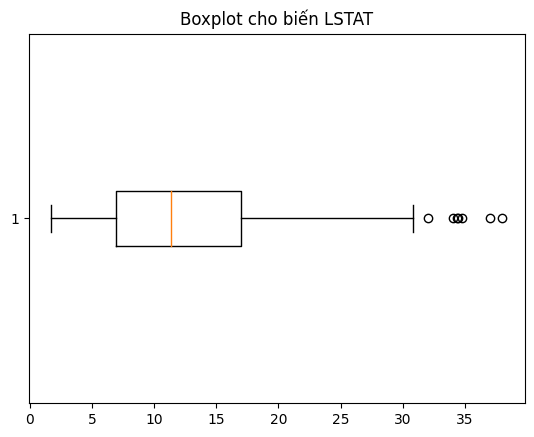

In [ ]:
# Vẽ boxplot cho biến lstat
plt.boxplot(df['lstat'], vert= False)
plt.title('Boxplot cho biến LSTAT')
plt.show()

Đối với RM có thể không cần xử lý giá trị ngoại lai vì độ lệch khá nhỏ và phân phối của nó gần với phân phối chuẩn.  
Đối với LSTAT, ta có thể sử dụng phương pháp loại bỏ giá trị ngoại lai dựa trên giá trị lower_bound và upper_bound tính được từ IQR như đã đề cập ở trên.  

In [ ]:
#Tính IQR
q1 = np.percentile(df['lstat'], 25)
q3 = np.percentile(df['lstat'], 75)
iqr = q3 - q1
#Tính giá trị lower_bound và upper_bound
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

#Loại bỏ các giá trị ngoại lai của LSTAT
df = df[(df['lstat'] > lower_bound) & (df['lstat'] < upper_bound)]

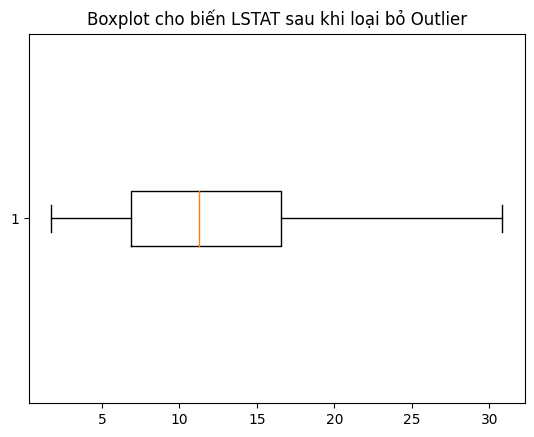

In [ ]:
# Vẽ boxplot cho biến LSTAT sau khi loại bỏ Outlier
plt.boxplot(df['lstat'], vert= False)
plt.title('Boxplot cho biến LSTAT sau khi loại bỏ Outlier')
plt.show()

3. Tách tập dữ liệu thành tập huấn luyện và tập kiểm tra.  

In [ ]:
# Chọn các thuộc tính RM và LSTAT làm biến độc lập, MEDV làm biến phụ thuộc
X = df[['rm', 'lstat']].values
y = df['medv'].values

# Thêm một cột chứa giá trị 1 vào ma trận X để tính toán hệ số chặn
X = np.insert(X, 0, 1, axis=1)
# Chia dữ liệu thành tập train và tập test tỉ lệ 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

4. Áp dụng phương pháp hồi quy tuyến tính để dự đoán giá nhà bằng cách tối ưu hóa hàm mất mát bằng phương pháp bình phương tối tiểu.  

In [ ]:
#Kiểm tra ma trận X^T X có thể đảo ngược hay không
XTX = X_train.T.dot(X_train)
det = np.linalg.det(XTX)
if det == 0:
    print("Ma trận X^T X không thể đảo ngược.")
else:
    print("Ma trận X^T X có thể đảo ngược.")

Ma trận X^T X có thể đảo ngược.


In [ ]:
# Tính toán bộ tham số theta bằng phương pháp bình phương tối tiểu
XT = np.transpose(X_train)
XTX1 = np.linalg.inv(XT.dot(X_train))
XTY = XT.dot(y_train)
theta = XTX1.dot(XTY)

In [ ]:
print(theta)
print(f"MEDV = {theta[0]} + {theta[1]} * RM + {theta[2]}* LSTAT")

[ 2.95233514  4.64030414 -0.75653081]
MEDV = 2.9523351404177447 + 4.640304135047529 * RM + -0.7565308141076308* LSTAT


Mô hình hồi quy tuyến tính được sử dụng để dự đoán giá trị của MEDV dựa trên 2 đặc trưng là RM và LSTAT. Công thức hồi quy tuyến tính được tạo ra từ mô hình là:  
MEDV = 2.9523351404177447 + 4.640304135047529 * RM -0.7565308141076308 * LSTAT.

Giá trị hệ số góc (slope) của RM là 4.640304135047529, cho thấy giữa RM và MEDV có một mối quan hệ thuận (positive correlation), tức là khi giá trị của RM tăng, giá trị của MEDV cũng tăng.

Giá trị hệ số góc (slope) của LSTAT là -0.7565308141076308, cho thấy giữa LSTAT và MEDV có một mối quan hệ nghịch (negative correlation), tức là khi giá trị của LSTAT tăng, giá trị của MEDV giảm.

Giá trị hệ số chặn (intercept) của mô hình là 2.9523351404177447, cho biết giá trị của MEDV khi RM = 0 và LSTAT = 0 là 2.9523351404177447.

Những hệ số này có thể được sử dụng để dự đoán giá trị MEDV dựa trên RM và LSTAT cho các bộ dữ liệu mới. Tuy nhiên, cần chú ý rằng mô hình chỉ có thể dự đoán độ chính xác của MEDV đến mức độ có thể giải thích được bởi RM và LSTAT, và có thể có những yếu tố khác cũng ảnh hưởng đến giá trị của MEDV mà mô hình này không bao gồm.

Sau khi có được bộ tham số theta cho phương trình hồi quy tuyến tính đa biến, ta sẽ biểu diễn dưới dạng một mặt phẳng trong không gian ba chiều tương ứng với 2 biến độc lập(RM, LSTAT) và 1 biến phụ thuộc (MEDV):

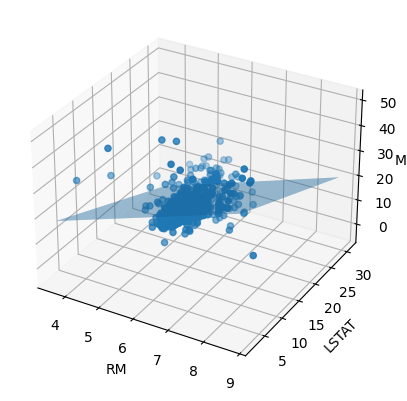

In [ ]:
x_min = np.min(X[:, 1])
x_max = np.max(X[:, 1])
y_min = np.min(X[:, 2])
y_max = np.max(X[:, 2])
xx, yy = np.meshgrid(np.linspace(x_min, x_max), np.linspace(y_min, y_max))
Z = theta[0] + theta[1] * xx + theta[2] * yy
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 1], X[:, 2], y)
ax.plot_surface(xx, yy, Z, alpha=0.5)
ax.set_xlabel('RM')
ax.set_ylabel('LSTAT')
ax.set_zlabel('MEDV')
plt.show()

##### **III. Bình luận về Kết Quả**  
<br>  
<b>A. Dự đoán giá nhà dựa trên tham số tối ưu vừa tìm được</b>  

In [ ]:
# Dự đoán giá trị nhà cho tập kiểm tra
y_pred = np.dot(X_test, theta)
residuals = y_test - y_pred

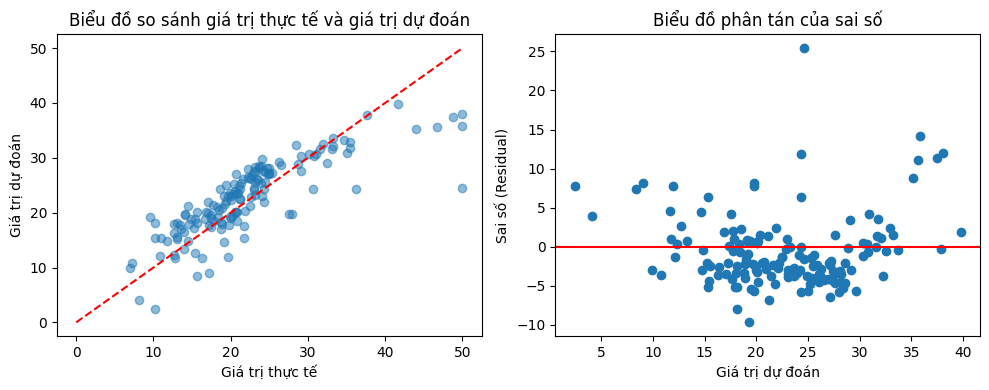

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Vẽ biểu đồ so sánh giá trị thực tế và giá trị dự đoán
ax1.scatter(y_test, y_pred, alpha=0.5)
ax1.plot([0, max(y_test)], [0, max(y_test)], '--', color='red')
ax1.set_xlabel('Giá trị thực tế')
ax1.set_ylabel('Giá trị dự đoán')
ax1.set_title('Biểu đồ so sánh giá trị thực tế và giá trị dự đoán')

# Vẽ đồ thị Residual Plot
ax2.scatter(y_pred, residuals)
ax2.axhline(y=0, color='r', linestyle='-')
ax2.set_xlabel('Giá trị dự đoán')
ax2.set_ylabel('Sai số (Residual)')
ax2.set_title('Biểu đồ phân tán của sai số')

plt.tight_layout()
plt.show()


- Trong biểu đồ đầu tiên (phía trái), chúng ta so sánh giá trị thực tế và giá trị dự đoán. Các điểm được biểu diễn bởi các chấm màu xanh. Đường màu đỏ thể hiện đường đường chéo (y = x) biểu thị sự tương đồng giữa giá trị thực tế và giá trị dự đoán. Nếu các điểm dữ liệu nằm gần đường đường chéo (đường màu đỏ), thì mô hình dự đoán tốt, ngược lại, nếu các điểm dữ liệu nằm xa đường đường chéo, thì mô hình dự đoán không tốt.
  
    Trong biểu đồ này, nếu xét trên toàn bộ giá trị thì có thể thấy rằng mô hình có xu hướng dự đoán thấp hơn giá trị thực tế khi giá trị thực tế lớn hơn khoảng 30. Tuy nhiên, với các giá trị thực tế thấp hơn, mô hình dự đoán tương đối chính xác.

- Trong biểu đồ thứ hai (phía phải), chúng ta biểu diễn các sai số (residuals) bằng các chấm màu xanh. Đường màu đỏ là đường thẳng y = 0, đại diện cho trường hợp không có sai số. Các điểm được phân bố đều quanh đường này thì chúng ta có thể kết luận rằng mô hình hồi quy tuyến tính là tốt.

    Biểu đồ residual plot trong ví dụ dự đoán giá nhà cho thấy rằng các sai số (residuals) phân bố ngẫu nhiên quanh giá trị trung bình bằng 0, cho thấy rằng mô hình hồi quy tuyến tính đã đáp ứng tốt yêu cầu về sự ngẫu nhiên và độc lập giữa các điểm dữ liệu. Điều này giúp đảm bảo tính tin cậy của các dự đoán và khả năng áp dụng mô hình cho các trường hợp mới.

    Tuy nhiên, vẫn còn một số điểm dữ liệu nằm xa đường trung bình, cho thấy rằng mô hình chưa thể hoàn toàn mô tả được các biến động trong dữ liệu. Điều này có thể là do sự phụ thuộc của mô hình vào các giả định về phân phối và tương quan giữa các biến đầu vào, hoặc có thể là do sự tồn tại của các giá trị ngoại lai hoặc dữ liệu bất thường. Các điểm dữ liệu này cần được xem xét kỹ hơn để xác định nguyên nhân và cải thiện mô hình nếu cần thiết.

**B. Đánh giá sự hiệu quả của phương trình vừa tìm được dựa trên RMSE và R bình phương**  

<u><i>Khái niệm về RMSE:</u></i>   
RMSE được tính bằng công thức toán học như sau:

RMSE = $\sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_{test_i} - y_{pred_i})^2}$

Trong đó:

- RMSE là Root Mean Square Error
- n là số lượng điểm dữ liệu
- y_test_i là giá trị thực tế của điểm dữ liệu thứ i  
- y_pred_i là giá trị dự đoán của điểm dữ liệu thứ i  

Công thức này được sử dụng để đánh giá độ chính xác của mô hình dự đoán. RMSE càng nhỏ thì mô hình dự đoán càng chính xác. RMSE thường được sử dụng trong các bài toán dự đoán, như trong bài toán dự đoán giá nhà ở đây.


In [ ]:
# Tính toán sai số RMSE
rmse = np.sqrt(np.mean((y_test - y_pred) ** 2))
# Tính giá trị trung bình của biến mục tiêu
y_mean = np.mean(y_test)
print('Giá trị trung bình của biến mục tiêu:', y_mean)
print('RMSE:', rmse)

# Nhận xét kết quả
if rmse < y_mean:
    print('RMSE nhỏ hơn giá trị trung bình của biến mục tiêu, mô hình có độ chính xác tương đối tốt.')
else:
    print('RMSE lớn hơn giá trị trung bình của biến mục tiêu, mô hình có độ chính xác tương đối thấp.')

Giá trị trung bình của biến mục tiêu: 22.12733333333333
RMSE: 4.731245827747277
RMSE nhỏ hơn giá trị trung bình của biến mục tiêu, mô hình có độ chính xác tương đối tốt.


<u><i>Khái niệm về R-squared</u></i>:  
R-squared (R^2) là một đại lượng thống kê dùng để đánh giá độ chính xác của một mô hình hồi quy. R^2 cho biết tỷ lệ phần trăm sự biến thiên của biến mục tiêu (được giải thích bởi mô hình) được giải thích bởi các biến độc lập trong mô hình. R^2 có giá trị từ 0 đến 1, và giá trị càng gần 1 thì mô hình càng tốt.

Công thức toán học để tính R^2 là:

R square: $R^2 = 1 - \frac{SS_{res}}{SS_{tot}}$  

SS_res: $SS_{res} = \sum_{i=1}^{n}(y_{test_i} - y_{pred_i})^2$  
SS_tot: $SS_{tot} = \sum_{i=1}^{n}(y_{test_i} - \bar{y})^2$  

Trong đó:  
- $y_{true_i}$ là giá trị thực tế của mẫu dữ liệu thứ i  
- $y_{pred_i}$ là giá trị dự đoán của mẫu dữ liệu thứ i  
- $\bar{y}$ là giá trị trung bình của biến mục tiêu (trong trường hợp này là giá nhà ở), và n là số lượng mẫu dữ liệu.

Trong đó, SS_res là tổng bình phương sai số của mô hình, còn SS_tot là tổng bình phương sai số của giá trị trung bình của biến mục tiêu.  
Cả SS_res và SS_tot được tính bằng cách lấy tổng bình phương của hiệu giữa giá trị dự đoán và giá trị thực tế.  

R^2 có ý nghĩa quan trọng trong việc đánh giá mô hình hồi quy.  
Giá trị R^2 cao hơn cho thấy mô hình giải thích được một phần lớn sự biến thiên của biến mục tiêu, và do đó là một mô hình tốt hơn.  


In [ ]:
#Tính R-squared
SS_res = sum((y_test - y_pred)**2)
SS_tot = sum((y_test - y_mean)**2)
R_squared = (1 - SS_res/SS_tot)

print(R_squared)

0.681973593367553


Dựa trên giá trị R-square và RMSE, có thể đánh giá mô hình khá tốt. Giá trị R-square là 0.68, cho thấy rằng mô hình giải thích được khoảng 68% sự biến thiên của biến phụ thuộc bằng các biến độc lập trong mô hình.

**C. Mở Rộng**

Kết quả của mô hình dự báo giá nhà ở Boston dựa trên hai biến độc lập RM và LSTAT cho thấy rằng mô hình có khả năng dự đoán tương đối tốt. Kết quả R-square của mô hình là 0.68, cho thấy rằng 68% phương sai của giá nhà được giải thích bởi hai biến độc lập RM và LSTAT. Đồng thời, residual plot cho thấy sự tập trung của các điểm dữ liệu xung quanh đường trung bình, tuy nhiên vẫn còn một số điểm ngoại lệ và biên độ của sai số không đồng đều, có thể cần phải tìm hiểu kỹ hơn để tối ưu mô hình.  

Một số đề xuất để cải thiện kết quả của mô hình bao gồm:

- Sử dụng thêm các biến độc lập khác như TAX, AGE, NOX, DIS để phân tích ảnh hưởng của chúng đến giá nhà.  
- Áp dụng các phương pháp tiền xử lý dữ liệu như chuẩn hóa, chuyển đổi, xử lý dữ liệu bị khuyết để giảm thiểu ảnh hưởng của nhiễu và dữ liệu bất thường đến kết quả.  
- Thử nghiệm và so sánh hiệu quả của các mô hình khác như Random Forest, Decision Tree, SVM để tìm ra mô hình phù hợp nhất với dữ liệu và giải thích tốt hơn các biến độc lập.  
  
Tóm lại, việc mở rộng các yếu tố đó có thể cải thiện độ chính xác của mô hình dự đoán giá nhà ở Boston, giúp phân tích ảnh hưởng của các biến độc lập và dự đoán giá trị nhà chính xác hơn.